In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Measures apathy towards Bitcoin Cash (0 to 1, 0=low apathy, 1=high apathy)
def bchApathyIndex(name, df):
    bitcoinCashsearch1 = "bitcoincash"
    bitcoinCashsearch2 = "bitcoin cash"
    bcashSearch3 = "bcash"
    bitcoinCashCounter=0
    bcashCounter=0
    for i in df["text"]:
        if bitcoinCashsearch1 in i.lower():
            bitcoinCashCounter+=1
        elif bitcoinCashsearch2 in i.lower():
            bitcoinCashCounter+=1
        elif bcashSearch3 in i.lower():
            bcashCounter+=1
    
    totalMentions = bcashCounter+bitcoinCashCounter
    if totalMentions!=0:
        index = bcashCounter/totalMentions
    else:
        index = None
    return [name, totalMentions, index]

49
[0.041666666666666664, 0.047619047619047616, 0.052631578947368418, 0.054054054054054057, 0.066666666666666666, 0.095238095238095233, 0.10000000000000001, 0.10000000000000001, 0.14285714285714285, 0.14285714285714285, 0.15384615384615385, 0.15909090909090909, 0.17647058823529413, 0.17948717948717949, 0.18181818181818182, 0.19327731092436976, 0.21875, 0.22222222222222221, 0.25, 0.25, 0.29411764705882354, 0.32142857142857145, 0.33333333333333331, 0.33333333333333331, 0.33333333333333331, 0.33333333333333331, 0.35964912280701755, 0.375, 0.42857142857142855, 0.52173913043478259, 0.5714285714285714, 0.61904761904761907, 0.64444444444444449, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.6875, 0.70129870129870131, 0.70930232558139539, 0.73333333333333328, 0.76000000000000001, 0.76190476190476186, 0.77551020408163263, 0.81481481481481477, 0.81521739130434778, 0.84782608695652173, 1.0, 1.0, 1.0]


'\nfor i in range(len(BCAI)):\n    if BCAI["Total Mentions"][i]>400:\n        print(BCAI["Name"][i], BCAI["Score"][i])\n'

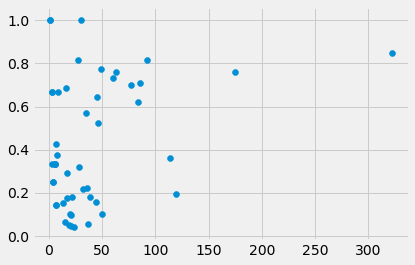

In [19]:
# Creates dataframe of Bitcoin Cash Apathy Index (BCAI)

handleNameDict = pickle.load(open("handleNamePair.pickle", "rb"))

# Builds Bitcoin Cash Apathy Index (BCAI): [Name, number of btc/bch mentions, apathy index value (0 to 1)]
BCAI = []
for name in handleNameDict:
    df = pd.read_csv("./Tweets/"+str(handleNameDict[name])+"_tweets.csv")
    userData = bchApathyIndex(name, df)
    BCAI.append(userData)

# Creates dataframe with columns: Name|Total Mentions (of bitcoin cash)|(BCAI) Score (0 to 1)
BCAI = pd.DataFrame(BCAI)
BCAI = BCAI.rename(columns={0:"Name", 1:"Total Mentions", 2:"Score"})

# Plots "Score vs Num. Mentions"
#plt.scatter(BCAI["Total Mentions"], BCAI["Score"])
mentions = []
score = []
counter=0
for i in range(len(BCAI["Score"])):
    if BCAI["Score"][i]>0.01:
        counter+=1
        mentions.append(BCAI["Total Mentions"][i])
        score.append(BCAI["Score"][i])
plt.scatter(mentions, score)
print(counter)
print(sorted(score))
'''
for i in range(len(BCAI)):
    if BCAI["Total Mentions"][i]>400:
        print(BCAI["Name"][i], BCAI["Score"][i])
'''

In [22]:
def searchTweets(keyword, name, df):
    counter = 0
    for i in df["text"]:
        if keyword in i.lower():
            counter+=1

    print(str(keyword) + " appeared " + str(counter) + " time(s) for " + str(name))

handleNameDict = pickle.load(open("handleNamePair.pickle", "rb"))
for name in handleNameDict:
    df = pd.read_csv("./Tweets/"+str(handleNameDict[name])+"_tweets.csv")
    searchTweets("2x", name, df)

2x appeared 16 time(s) for Vitalik Buterin
2x appeared 108 time(s) for Charlie Lee
2x appeared 17 time(s) for Brian Armstrong
2x appeared 9 time(s) for Roger Ver
2x appeared 14 time(s) for Andreas M. Antonopoulos
2x appeared 15 time(s) for Nick Szabo
2x appeared 11 time(s) for Don Tapscott
2x appeared 6 time(s) for Gavin Andresen
2x appeared 8 time(s) for Jihan Wu
2x appeared 45 time(s) for Laura Shin
2x appeared 10 time(s) for Thomas Power
2x appeared 98 time(s) for Erik Voorhees
2x appeared 5 time(s) for Tyler Winklevoss
2x appeared 50 time(s) for Barry Silbert
2x appeared 102 time(s) for Tuur Demeester
2x appeared 72 time(s) for Vinny Lingham
2x appeared 61 time(s) for Charlie Shrem
2x appeared 104 time(s) for Peter Todd
2x appeared 232 time(s) for Adam Back
2x appeared 82 time(s) for Tone Vays
2x appeared 64 time(s) for Jameson Lopp
2x appeared 7 time(s) for Tim Draper
2x appeared 159 time(s) for Jeff Garzik
2x appeared 21 time(s) for Bobby Lee
2x appeared 10 time(s) for Fred Wilso